## Identify core of AW layer in each row

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
theta_dir = 'H:/PhD_chap3/data/ECCO_melville/rows_netcdfs/THETA/'
salt_dir  = 'H:/PhD_chap3/data/ECCO_melville/rows_netcdfs/SALT/'

Open theta datasets

In [3]:
theta_row000 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row000.nc')
theta_row025 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row025.nc')
theta_row050 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row050.nc')
theta_row075 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row075.nc')
theta_row100 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row100.nc')
theta_row125 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row125.nc')
theta_row150 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row150.nc')

Open salinity datasets

In [4]:
salt_row000 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row000.nc')
salt_row025 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row025.nc')
salt_row050 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row050.nc')
salt_row075 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row075.nc')
salt_row100 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row100.nc')
salt_row125 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row125.nc')
salt_row150 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row150.nc')

Calculate seasonal climatologies

In [5]:
## define a function to map timestamps to seasons
def map_to_season(month):
    if 1 <= month <= 3:
        return 'JFM'
    elif 4 <= month <= 6:
        return 'AMJ'
    elif 7 <= month <= 9:
        return 'JAS'
    elif 10 <= month <= 12:
        return 'OND'

## create function to take seasonal means
def seasonal_mean(ds):
    ## apply the above function to create a new coordinate 'season'
    seasons_array = xr.apply_ufunc(map_to_season, ds['time.month'], dask = 'allowed', vectorize = True)
    ds.coords['season'] = ('time', seasons_array.values)

    # group by 'season' and calculate the mean of 'value' for each season
    seasonal_means = ds.groupby('season').mean()
    return seasonal_means

In [6]:
## apply function to datasets

## theta
theta_row000_season = seasonal_mean(theta_row000)
theta_row025_season = seasonal_mean(theta_row025)
theta_row050_season = seasonal_mean(theta_row050)
theta_row075_season = seasonal_mean(theta_row075)
theta_row100_season = seasonal_mean(theta_row100)
theta_row125_season = seasonal_mean(theta_row125)
theta_row150_season = seasonal_mean(theta_row150)

## salinity
salt_row000_season = seasonal_mean(salt_row000)
salt_row025_season = seasonal_mean(salt_row025)
salt_row050_season = seasonal_mean(salt_row050)
salt_row075_season = seasonal_mean(salt_row075)
salt_row100_season = seasonal_mean(salt_row100)
salt_row125_season = seasonal_mean(salt_row125)
salt_row150_season = seasonal_mean(salt_row150)

In [7]:
## mask values that are not the model solution (i.e., land)
## theta
theta_row000_season = theta_row000_season.where(salt_row000_season.SALT>0)
theta_row025_season = theta_row025_season.where(salt_row025_season.SALT>0)
theta_row050_season = theta_row050_season.where(salt_row050_season.SALT>0)
theta_row075_season = theta_row075_season.where(salt_row075_season.SALT>0)
theta_row100_season = theta_row100_season.where(salt_row100_season.SALT>0)
theta_row125_season = theta_row125_season.where(salt_row125_season.SALT>0)
theta_row150_season = theta_row150_season.where(salt_row150_season.SALT>0)

## salinity
salt_row000_season = salt_row000_season.where(salt_row000_season.SALT>0)
salt_row025_season = salt_row025_season.where(salt_row025_season.SALT>0)
salt_row050_season = salt_row050_season.where(salt_row050_season.SALT>0)
salt_row075_season = salt_row075_season.where(salt_row075_season.SALT>0)
salt_row100_season = salt_row100_season.where(salt_row100_season.SALT>0)
salt_row125_season = salt_row125_season.where(salt_row125_season.SALT>0)
salt_row150_season = salt_row150_season.where(salt_row150_season.SALT>0)

In [8]:
theta_row025_season

<xarray.Dataset>
Dimensions:       (season: 4, cols: 300, depth: 72)
Coordinates:
  * depth         (depth) float32 0.5 1.57 2.79 ... 2.281e+03 2.389e+03
  * season        (season) object 'AMJ' 'JAS' 'JFM' 'OND'
Dimensions without coordinates: cols
Data variables:
    longitude     (season, cols, depth) float32 nan nan nan nan ... nan nan nan
    latitude      (season, cols, depth) float32 nan nan nan nan ... nan nan nan
    iter_numbers  (season, depth, cols) float64 nan nan nan nan ... nan nan nan
    years         (season, depth, cols) float64 nan nan nan nan ... nan nan nan
    months        (season, depth, cols) float64 nan nan nan nan ... nan nan nan
    days          (season, depth, cols) float64 nan nan nan nan ... nan nan nan
    THETA         (season, depth, cols) float32 nan nan nan nan ... nan nan nan

### Identify core of AW layer

### Row 0

cols = slice(190,230) \
depth = slice(200,320)

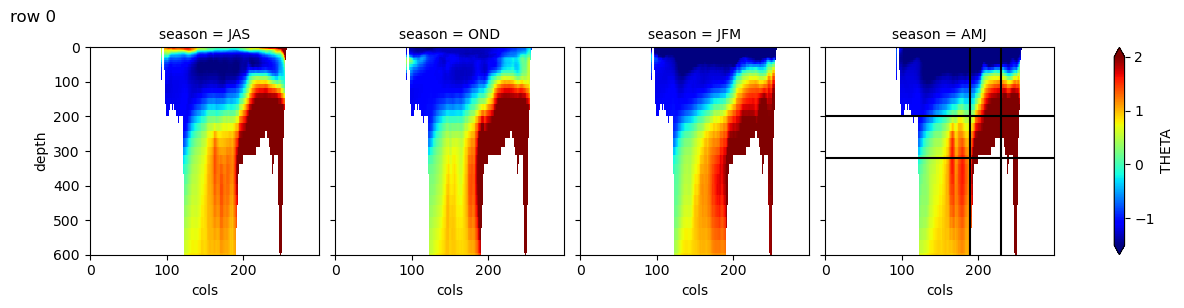

In [40]:
theta_row000_season.THETA.sel(season=['JAS','OND','JFM','AMJ']).plot(col='season',cmap='jet',vmin=-1.5,vmax=2)
plt.ylim(600,0);
plt.suptitle("row 0",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
plt.axhline(y=200,color='k')
plt.axhline(y=320,color='k')
plt.axvline(x=190,color='k')
plt.axvline(x=230,color='k');

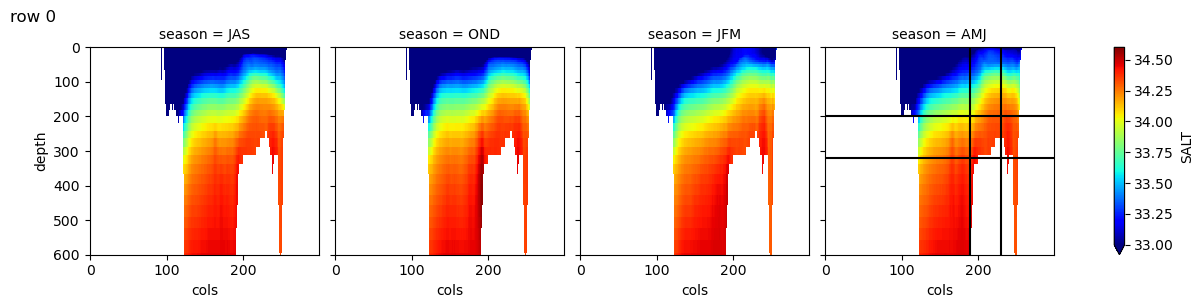

In [18]:
salt_row000_season.SALT.sel(season=['JAS','OND','JFM','AMJ']).plot(col='season',cmap='jet',vmin=33,vmax=34.6)
plt.ylim(600,0);
plt.suptitle("row 0",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
plt.axhline(y=200,color='k')
plt.axhline(y=320,color='k')
plt.axvline(x=190,color='k')
plt.axvline(x=230,color='k');

### Row 25

cols = slice(160,210) \
depth = slice(275,400)

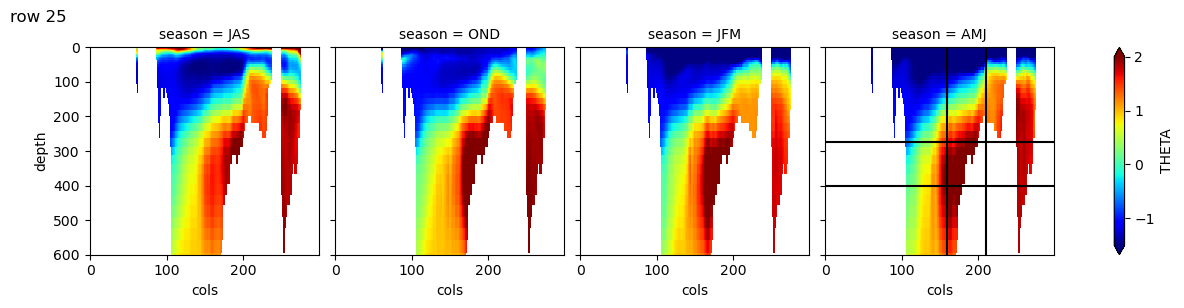

In [33]:
theta_row025_season.THETA.sel(season=['JAS','OND','JFM','AMJ']).plot(col='season',cmap='jet',vmin=-1.5,vmax=2)
plt.ylim(600,0);
plt.suptitle("row 25",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
plt.axhline(y=275,color='k')
plt.axhline(y=400,color='k')
plt.axvline(x=160,color='k')
plt.axvline(x=210,color='k');

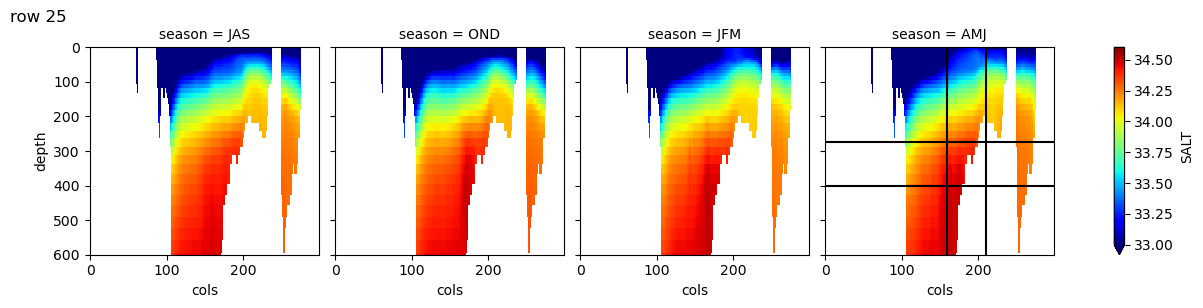

In [17]:
salt_row025_season.SALT.sel(season=['JAS','OND','JFM','AMJ']).plot(col='season',cmap='jet',vmin=33,vmax=34.6)
plt.ylim(600,0);
plt.suptitle("row 25",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
plt.axhline(y=275,color='k')
plt.axhline(y=400,color='k')
plt.axvline(x=160,color='k')
plt.axvline(x=210,color='k');

### Row 50

cols = slice(175,210) \
depth = slice(275,400)

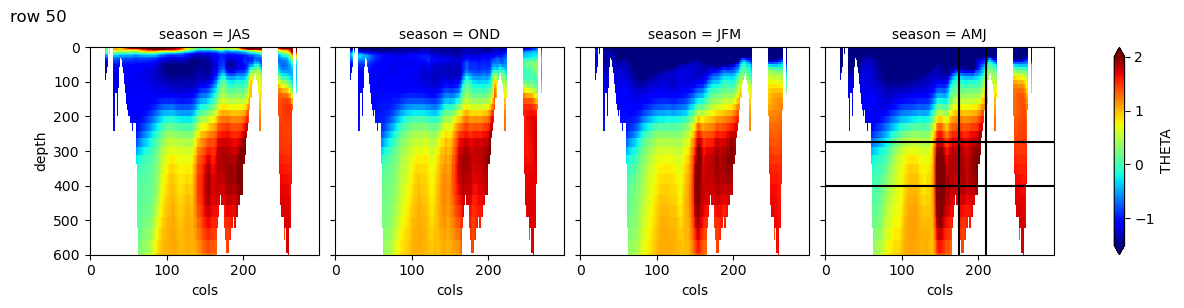

In [28]:
theta_row050_season.THETA.sel(season=['JAS','OND','JFM','AMJ']).plot(col='season',cmap='jet',vmin=-1.5,vmax=2)
plt.ylim(600,0);
plt.suptitle("row 50",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
plt.axhline(y=275,color='k')
plt.axhline(y=400,color='k')
plt.axvline(x=175,color='k')
plt.axvline(x=210,color='k');

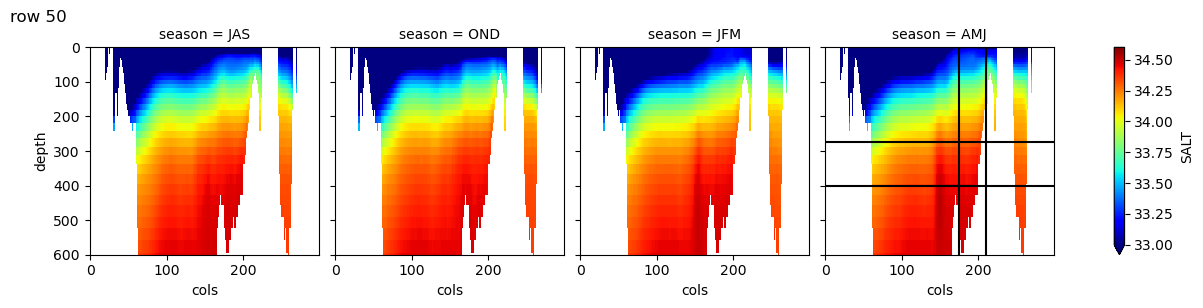

In [19]:
salt_row050_season.SALT.sel(season=['JAS','OND','JFM','AMJ']).plot(col='season',cmap='jet',vmin=33,vmax=34.6)
plt.ylim(600,0);
plt.suptitle("row 50",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
plt.axhline(y=275,color='k')
plt.axhline(y=400,color='k')
plt.axvline(x=175,color='k')
plt.axvline(x=210,color='k');

### Row 75

cols = slice(150,190) \
depth = slice(275,425)

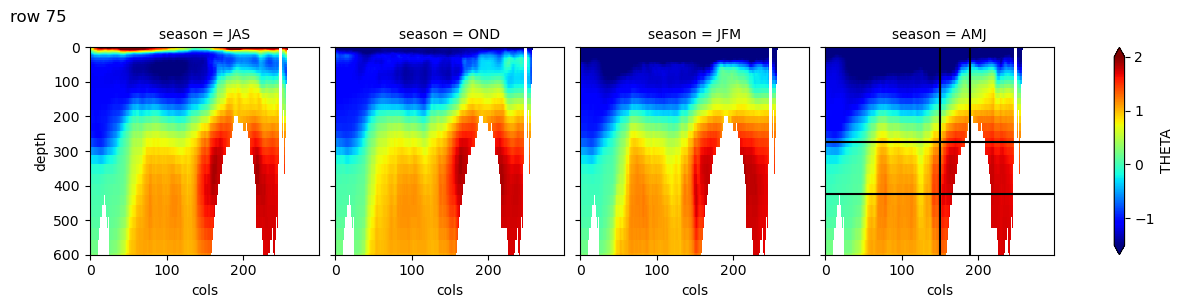

In [46]:
theta_row075_season.THETA.sel(season=['JAS','OND','JFM','AMJ']).plot(col='season',cmap='jet',vmin=-1.5,vmax=2)
plt.ylim(600,0);
plt.suptitle("row 75",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
plt.axhline(y=275,color='k')
plt.axhline(y=425,color='k')
plt.axvline(x=150,color='k')
plt.axvline(x=190,color='k');

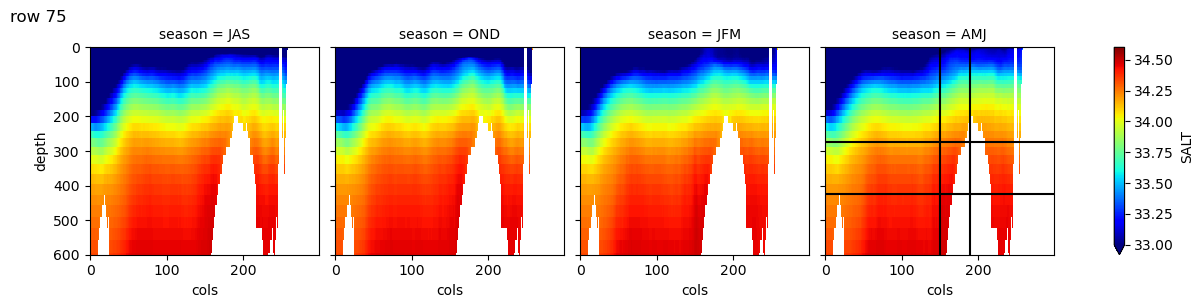

In [21]:
salt_row075_season.SALT.sel(season=['JAS','OND','JFM','AMJ']).plot(col='season',cmap='jet',vmin=33,vmax=34.6)
plt.ylim(600,0);
plt.suptitle("row 75",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
plt.axhline(y=275,color='k')
plt.axhline(y=425,color='k')
plt.axvline(x=150,color='k')
plt.axvline(x=190,color='k');

### Row 100

cols = slice(125,160) \
depth = slice(300,450)

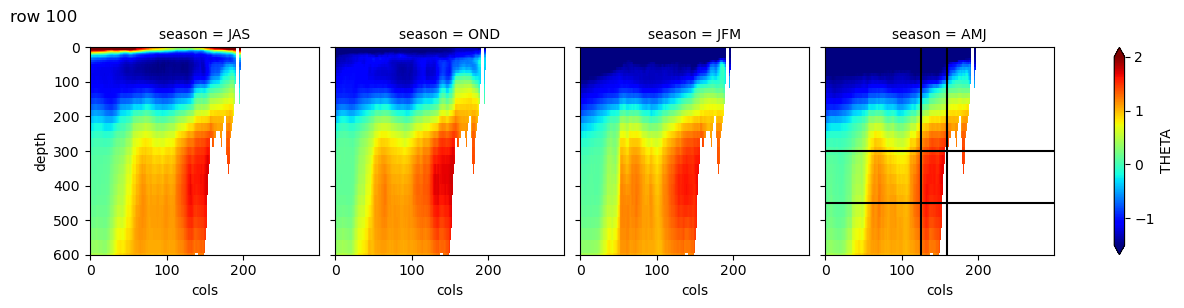

In [25]:
theta_row100_season.THETA.sel(season=['JAS','OND','JFM','AMJ']).plot(col='season',cmap='jet',vmin=-1.5,vmax=2)
plt.ylim(600,0);
plt.suptitle("row 100",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
plt.axhline(y=300,color='k')
plt.axhline(y=450,color='k')
plt.axvline(x=125,color='k')
plt.axvline(x=160,color='k');

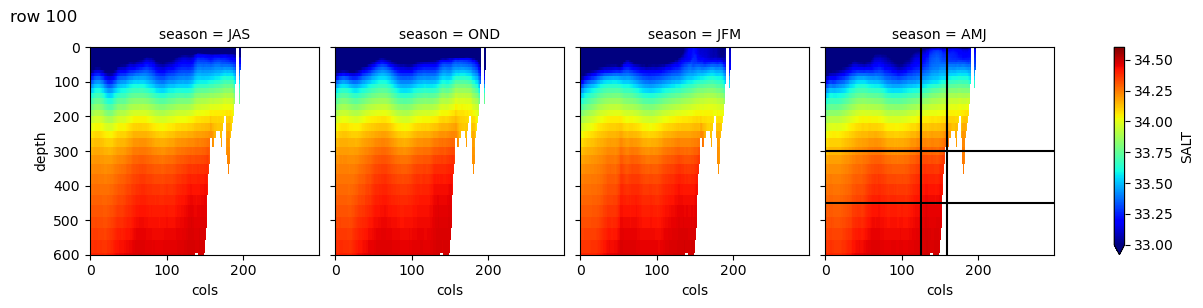

In [22]:
salt_row100_season.SALT.sel(season=['JAS','OND','JFM','AMJ']).plot(col='season',cmap='jet',vmin=33,vmax=34.6)
plt.ylim(600,0);
plt.suptitle("row 100",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
plt.axhline(y=300,color='k')
plt.axhline(y=450,color='k')
plt.axvline(x=125,color='k')
plt.axvline(x=160,color='k');

### Row 125

cols = slice(120,145) \
depth = slice(300,425)

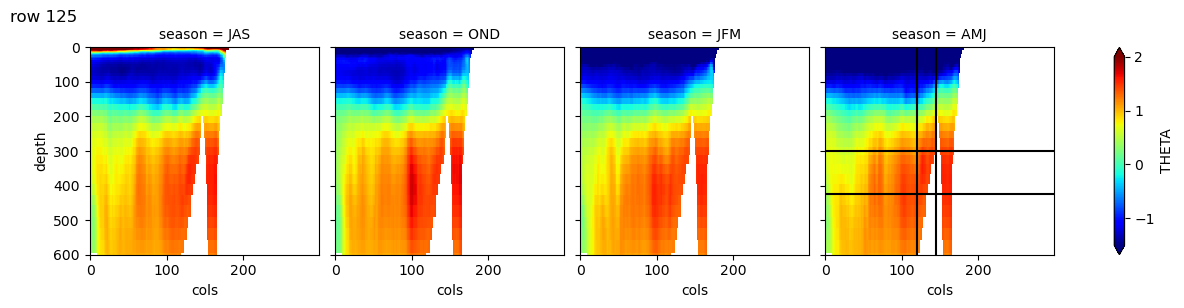

In [51]:
theta_row125_season.THETA.sel(season=['JAS','OND','JFM','AMJ']).plot(col='season',cmap='jet',vmin=-1.5,vmax=2)
plt.ylim(600,0);
plt.suptitle("row 125",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
plt.axhline(y=300,color='k')
plt.axhline(y=425,color='k')
plt.axvline(x=120,color='k')
plt.axvline(x=145,color='k');

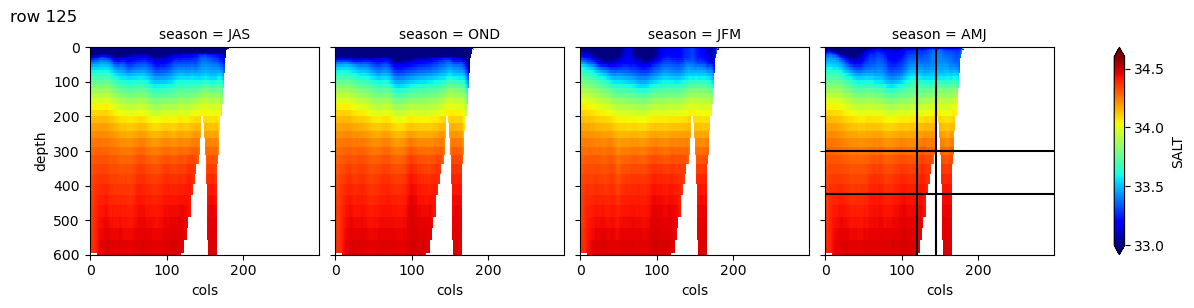

In [23]:
salt_row125_season.SALT.sel(season=['JAS','OND','JFM','AMJ']).plot(col='season',cmap='jet',vmin=33,vmax=34.6)
plt.ylim(600,0);
plt.suptitle("row 125",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
plt.axhline(y=300,color='k')
plt.axhline(y=425,color='k')
plt.axvline(x=120,color='k')
plt.axvline(x=145,color='k');

### Row 150

cols = slice(125,155) \
depth = slice(275,400)

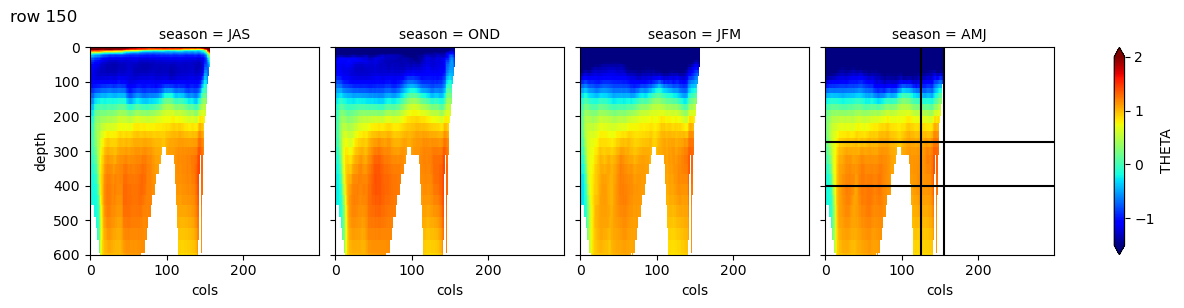

In [36]:
theta_row150_season.THETA.sel(season=['JAS','OND','JFM','AMJ']).plot(col='season',cmap='jet',vmin=-1.5,vmax=2)
plt.ylim(600,0);
plt.suptitle("row 150",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
plt.axhline(y=275,color='k')
plt.axhline(y=400,color='k')
plt.axvline(x=125,color='k')
plt.axvline(x=155,color='k');

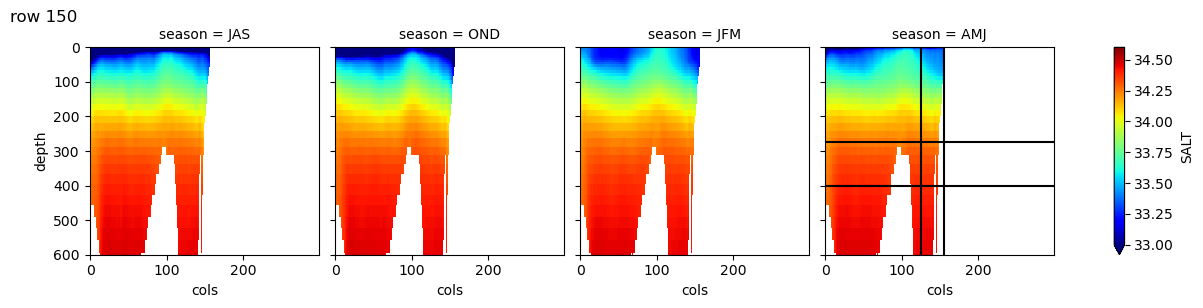

In [37]:
salt_row150_season.SALT.sel(season=['JAS','OND','JFM','AMJ']).plot(col='season',cmap='jet',vmin=33,vmax=34.6)
plt.ylim(600,0);
plt.suptitle("row 150",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
plt.axhline(y=275,color='k')
plt.axhline(y=400,color='k')
plt.axvline(x=125,color='k')
plt.axvline(x=155,color='k');

### quick and dirty plot of seasonality for all core AW layers

In [8]:
## subset all boxes in datasets
theta_row000_season_AW = theta_row000_season.sel(depth=slice(200,320)).isel(cols=slice(190,230)).mean(['cols','depth']).THETA
theta_row025_season_AW = theta_row025_season.sel(depth=slice(275,400)).isel(cols=slice(160,210)).mean(['cols','depth']).THETA
theta_row050_season_AW = theta_row050_season.sel(depth=slice(275,400)).isel(cols=slice(175,210)).mean(['cols','depth']).THETA
theta_row075_season_AW = theta_row075_season.sel(depth=slice(275,425)).isel(cols=slice(150,190)).mean(['cols','depth']).THETA
theta_row100_season_AW = theta_row100_season.sel(depth=slice(300,450)).isel(cols=slice(125,160)).mean(['cols','depth']).THETA
theta_row125_season_AW = theta_row125_season.sel(depth=slice(300,425)).isel(cols=slice(120,145)).mean(['cols','depth']).THETA
theta_row150_season_AW = theta_row150_season.sel(depth=slice(275,400)).isel(cols=slice(125,155)).mean(['cols','depth']).THETA

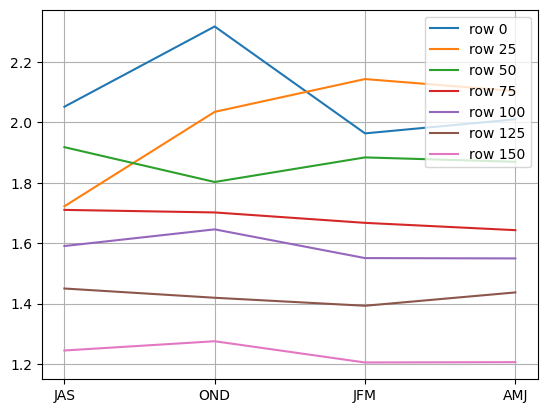

In [12]:
plt.plot([1,2,3,4],theta_row000_season_AW.sel(season=['JAS','OND','JFM','AMJ']), label='row 0')
plt.plot([1,2,3,4],theta_row025_season_AW.sel(season=['JAS','OND','JFM','AMJ']), label='row 25')
plt.plot([1,2,3,4],theta_row050_season_AW.sel(season=['JAS','OND','JFM','AMJ']), label='row 50')
plt.plot([1,2,3,4],theta_row075_season_AW.sel(season=['JAS','OND','JFM','AMJ']), label='row 75')
plt.plot([1,2,3,4],theta_row100_season_AW.sel(season=['JAS','OND','JFM','AMJ']), label='row 100')
plt.plot([1,2,3,4],theta_row125_season_AW.sel(season=['JAS','OND','JFM','AMJ']), label='row 125')
plt.plot([1,2,3,4],theta_row150_season_AW.sel(season=['JAS','OND','JFM','AMJ']), label='row 150')
plt.legend(loc='upper right')
plt.xticks(ticks=[1,2,3,4],labels=['JAS','OND','JFM','AMJ']);
plt.grid();